In [11]:
###  importing the important libraries : 

import pandas as pd
import matplotlib.pyplot as plt

In [13]:
###  loading the dataset :

df = pd.read_csv(r"C:\Users\vshar\Downloads\HR EDA\HR_comma_sep.csv")
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [14]:
###  ratio between the person left or not :

df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

##  Left :

In [15]:
###  filtering the dataset who left :

lft = df[df.left == 1]
lft

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Department  salary  
0                          0      sales     low  
1                          0      sales  medium  
2                          0      sales  medium  
3                          0      sales     low  
4                          0      sales     low  
...                      ...        ...     ...  
14994                      0    support     low  
14995                      0    support     low  
14996                      0    support     low  
14997                      0    support     low  
14998                      0    support     low  

[3571 rows x 10 columns]

###  Department wise employee retention :

In [16]:
###  number of person left department wise :

a = lft.Department.value_counts()
a

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: Department, dtype: int64

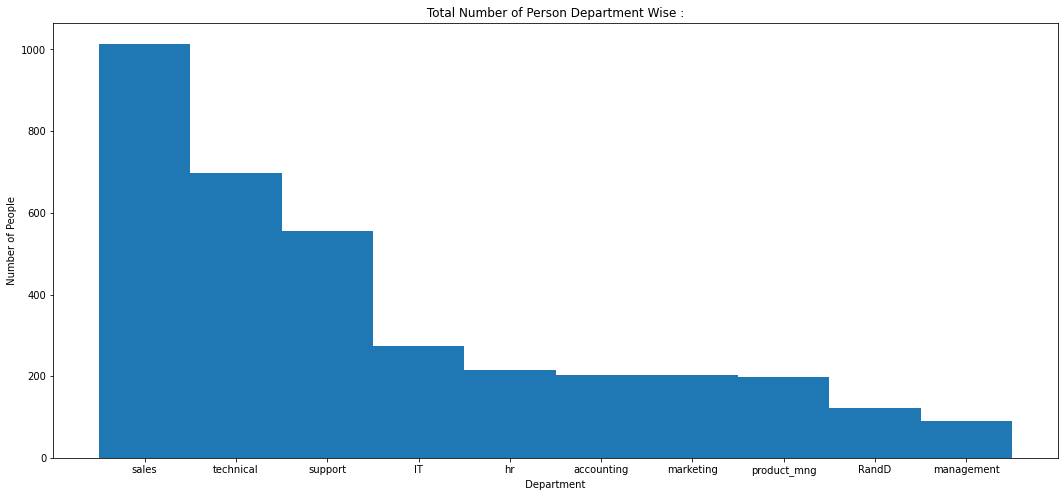

In [17]:
### number of person left department wise with the help of graph :

plt.figure(figsize=(18,8))
plt.bar(a.index, a.values, width=1.0)
plt.xlabel(" Department ")
plt.ylabel(" Number of People ")
plt.title(" Total Number of Person Department Wise : ")
plt.show()

###  Salary wise employee retention :

In [18]:
###  number of person left salary wise :

b = lft.salary.value_counts()
b

low       2172
medium    1317
high        82
Name: salary, dtype: int64

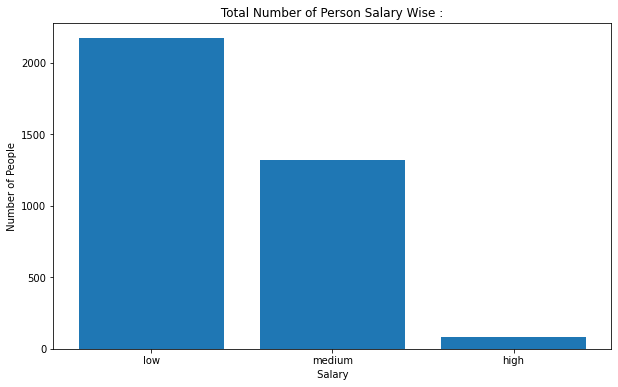

In [19]:
###  number of person left salary wise ny using graph :

plt.figure(figsize=(10,6))
plt.bar(b.index, b.values)
plt.xlabel(" Salary ")
plt.ylabel(" Number of People ")
plt.title(" Total Number of Person Salary Wise : ")
plt.show()

In [20]:
###  median of the average monthly hours : 

lft.average_montly_hours.median()

224.0

##  There are 3 type of parametre that may impact on employee retension :

#### (a)   Department
#### (b)   Salary
#### (c)   Average Monthly Hours

In [21]:
###  dataframe without columns ( department, salary ) :

dns = lft.drop(['Department', 'salary'], axis='columns')
dns.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  
0                   3              0     1                      0  
1                   6              0     1                      0  
2                   4              0     1                      0  
3                   5              0     1                      0  
4                   3              0     1                      0

In [22]:
dns.satisfaction_level.median()

0.41

In [23]:
dns.satisfaction_level.mean()

0.4400980117614114

In [24]:
###  all other factors impacts on left : 

import plotly.graph_objects as go
columns = ['satisfaction_level','last_evaluation','number_project','time_spend_company','Work_accident','promotion_last_5years']

fig = go.Figure([go.Bar(x = columns, y=[dns.satisfaction_level.mean(), dns.last_evaluation.mean(), dns.number_project.mean(), 
                            dns.time_spend_company.mean(), dns.Work_accident.mean(), dns.promotion_last_5years.mean()])])
fig.show()

In [25]:
dns.Work_accident.value_counts()

0    3402
1     169
Name: Work_accident, dtype: int64

##  Non Left :

In [26]:
###  filtering the dataset who didn't left :

n_lft = df[df.left == 0]
n_lft

satisfaction_level  last_evaluation  number_project  \
2000                 0.58             0.74               4   
2001                 0.82             0.67               2   
2002                 0.45             0.69               5   
2003                 0.78             0.82               5   
2004                 0.49             0.60               3   
...                   ...              ...             ...   
14206                0.90             0.55               3   
14207                0.74             0.95               5   
14208                0.85             0.54               3   
14209                0.33             0.65               3   
14210                0.50             0.73               4   

       average_montly_hours  time_spend_company  Work_accident  left  \
2000                    215                   3              0     0   
2001                    202                   3              0     0   
2002                    193                   3              0     0   
2003                    247                   3              0     0   
2004                    214                   2              0     0   
...                     ...                 ...            ...   ...   
14206                   259                  10              1     0   
14207                   266                  10              0     0   
14208                   185                  10              0     0   
14209                   172                  10              0     0   
14210                   180                   3              0     0   

       promotion_last_5years  Department salary  
2000                       0       sales    low  
2001                       0       sales    low  
2002                       0       sales    low  
2003                       0       sales    low  
2004                       0       sales    low  
...                      ...         ...    ...  
14206                      1  management   high  
14207                      1  management   high  
14208                      1  management   high  
14209                      1   marketing   high  
14210                      0          IT    low  

[11428 rows x 10 columns]

In [27]:
###  number of persons department wise who didn't left :

n_lft.Department.value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: Department, dtype: int64

In [28]:
###  number of persons salary wise who didn't left :   

n_lft.salary.value_counts()

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

In [29]:
###  median of the average monthly hours :

n_lft.average_montly_hours.median()

198.0

In [30]:
###  original dataset :

df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Department  salary  
0                          0      sales     low  
1                          0      sales  medium  
2                          0      sales  medium  
3                          0      sales     low  
4                          0      sales     low  
...                      ...        ...     ...  
14994                      0    support     low  
14995                      0    support     low  
14996                      0    support     low  
14997                      0    support     low  
14998                      0    support     low  

[14999 rows x 10 columns]

In [31]:
###  getting dummies of the column salary :

dummies1 = pd.get_dummies(df.salary)
dummies1

high  low  medium
0         0    1       0
1         0    0       1
2         0    0       1
3         0    1       0
4         0    1       0
...     ...  ...     ...
14994     0    1       0
14995     0    1       0
14996     0    1       0
14997     0    1       0
14998     0    1       0

[14999 rows x 3 columns]

In [32]:
###  getting dummies of the column department :

dummies2 = pd.get_dummies(df.Department)
dummies2

IT  RandD  accounting  hr  management  marketing  product_mng  sales  \
0       0      0           0   0           0          0            0      1   
1       0      0           0   0           0          0            0      1   
2       0      0           0   0           0          0            0      1   
3       0      0           0   0           0          0            0      1   
4       0      0           0   0           0          0            0      1   
...    ..    ...         ...  ..         ...        ...          ...    ...   
14994   0      0           0   0           0          0            0      0   
14995   0      0           0   0           0          0            0      0   
14996   0      0           0   0           0          0            0      0   
14997   0      0           0   0           0          0            0      0   
14998   0      0           0   0           0          0            0      0   

       support  technical  
0            0          0  
1            0          0  
2            0          0  
3            0          0  
4            0          0  
...        ...        ...  
14994        1          0  
14995        1          0  
14996        1          0  
14997        1          0  
14998        1          0  

[14999 rows x 10 columns]

In [33]:
###  concatinating both the dummies :

dummies = pd.concat([dummies1, dummies2], axis='columns')
dummies.head()

high  low  medium  IT  RandD  accounting  hr  management  marketing  \
0     0    1       0   0      0           0   0           0          0   
1     0    0       1   0      0           0   0           0          0   
2     0    0       1   0      0           0   0           0          0   
3     0    1       0   0      0           0   0           0          0   
4     0    1       0   0      0           0   0           0          0   

   product_mng  sales  support  technical  
0            0      1        0          0  
1            0      1        0          0  
2            0      1        0          0  
3            0      1        0          0  
4            0      1        0          0

In [34]:
###  concatinating it to the final dataset :

final = pd.concat([df,dummies], axis='columns')
final

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Department  salary  ...  IT  RandD  accounting  \
0                          0      sales     low  ...   0      0           0   
1                          0      sales  medium  ...   0      0           0   
2                          0      sales  medium  ...   0      0           0   
3                          0      sales     low  ...   0      0           0   
4                          0      sales     low  ...   0      0           0   
...                      ...        ...     ...  ...  ..    ...         ...   
14994                      0    support     low  ...   0      0           0   
14995                      0    support     low  ...   0      0           0   
14996                      0    support     low  ...   0      0           0   
14997                      0    support     low  ...   0      0           0   
14998                      0    support     low  ...   0      0           0   

       hr  management  marketing  product_mng  sales  support  technical  
0       0           0          0            0      1        0          0  
1       0           0          0            0      1        0          0  
2       0           0          0            0      1        0          0  
3       0           0          0            0      1        0          0  
4       0           0          0            0      1        0          0  
...    ..         ...        ...          ...    ...      ...        ...  
14994   0           0          0            0      0        1          0  
14995   0           0          0            0      0        1          0  
14996   0           0          0            0      0        1          0  
14997   0           0          0            0      0        1          0  
14998   0           0          0            0      0        1          0  

[14999 rows x 23 columns]

In [35]:
###  total number of columns in the final dataset :

final.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary', 'high', 'low',
       'medium', 'IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'],
      dtype='object')

In [36]:
###  dropping the unnecessary colmuns from the final dataset :

final.drop(['Department','salary','low','RandD'], axis="columns", inplace=True)

In [37]:
final.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  high  \
0                   3              0     1                      0     0   
1                   6              0     1                      0     0   
2                   4              0     1                      0     0   
3                   5              0     1                      0     0   
4                   3              0     1                      0     0   

   medium  IT  accounting  hr  management  marketing  product_mng  sales  \
0       0   0           0   0           0          0            0      1   
1       1   0           0   0           0          0            0      1   
2       1   0           0   0           0          0            0      1   
3       0   0           0   0           0          0            0      1   
4       0   0           0   0           0          0            0      1   

   support  technical  
0        0          0  
1        0          0  
2        0          0  
3        0          0  
4        0          0

In [38]:
###  assigning the independent variable :

x = final.drop(["left"], axis="columns")
x.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  high  medium  IT  \
0                   3              0                      0     0       0   0   
1                   6              0                      0     0       1   0   
2                   4              0                      0     0       1   0   
3                   5              0                      0     0       0   0   
4                   3              0                      0     0       0   0   

   accounting  hr  management  marketing  product_mng  sales  support  \
0           0   0           0          0            0      1        0   
1           0   0           0          0            0      1        0   
2           0   0           0          0            0      1        0   
3           0   0           0          0            0      1        0   
4           0   0           0          0            0      1        0   

   technical  
0          0  
1          0  
2          0  
3          0  
4          0

In [39]:
###  assigning the dependent variable :

y = final.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [40]:
###  importing the train test method from the sklearn library :

from sklearn.model_selection import train_test_split

In [41]:
###  splitting the data into the multiple training testing datsets for the model :

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.01)

In [42]:
len(x_test)

150

In [43]:
###  importing the logistic regression method for the model :

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [44]:
### fitting our training data :

lr.fit(x_train,y_train)

C:\Users\vshar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [45]:
###  predicting the x test data :

lr.predict(x_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [46]:
###  compairing the accuracy between predicted data & the actual data :

lr.score(x_test,y_test)

0.7466666666666667